In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
# Importing Training and Test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(train_data.shape)
print(test_data.shape)

(381109, 12)
(127037, 11)


In [3]:
# Printing First five records of training data
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Checking any null record in training set
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
# Checking any null record in test set
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [6]:
# Getting unique values for feature and target column
columns = ['Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 
           'Vehicle_Damage','Response']
for i in np.arange(len(columns)):
    print("Unique values for column {} is {} ".format(columns[i],sorted(train_data[columns[i]].unique())))
    print("\n")

Unique values for column Gender is ['Female', 'Male'] 


Unique values for column Driving_License is [0, 1] 


Unique values for column Region_Code is [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0] 


Unique values for column Previously_Insured is [0, 1] 


Unique values for column Vehicle_Age is ['1-2 Year', '< 1 Year', '> 2 Years'] 


Unique values for column Vehicle_Damage is ['No', 'Yes'] 


Unique values for column Response is [0, 1] 




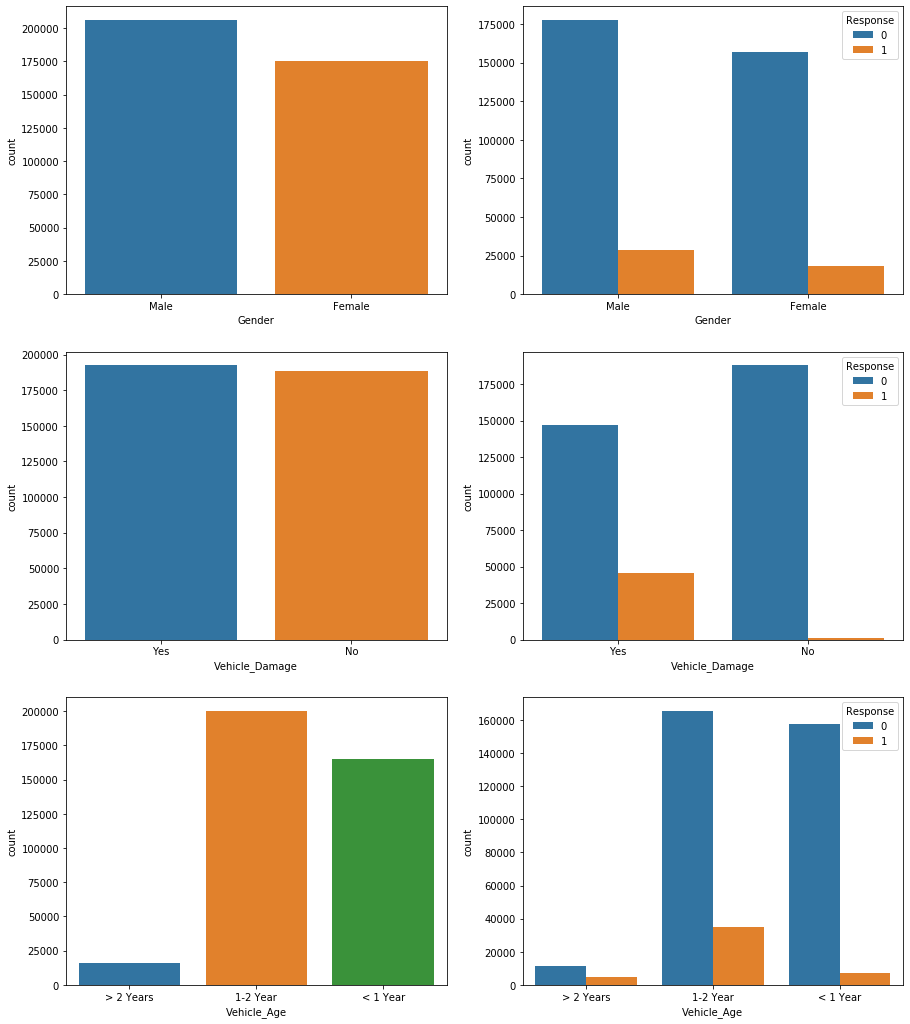

In [7]:
# Exploratory Data Analysis of Categorical Column
fig, ax = plt.subplots(3,2,figsize = (15,18))

cols = ["Gender","Vehicle_Damage","Vehicle_Age"]
for i in np.arange(len(cols)):
    sns.countplot(train_data[cols[i]], ax=ax[i][0])
    sns.countplot(train_data[cols[i]], hue=train_data["Response"], ax=ax[i][1])
plt.show()

In [8]:
# Changing datatype of categorical column from Float tom integer
train_data["Region_Code"]= train_data["Region_Code"].astype("int32")
train_data["Policy_Sales_Channel"] = train_data["Policy_Sales_Channel"].astype("int32")

test_data["Region_Code"]= test_data["Region_Code"].astype("int32")
test_data["Policy_Sales_Channel"] = test_data["Policy_Sales_Channel"].astype("int32")

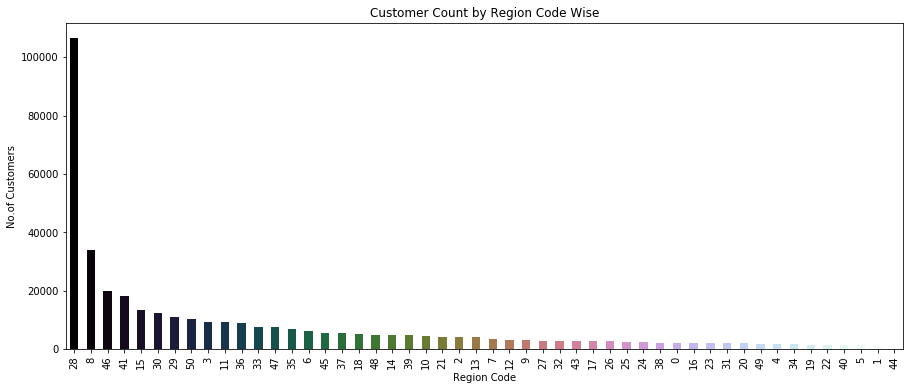

In [9]:
# Region Code
color = plt.cm.cubehelix(np.linspace(0,1,50))
ax =train_data["Region_Code"].value_counts().head(50).plot(kind ='bar', figsize =(15,6),title='Customer Count by Region Code Wise', color= color)
ax.set_xlabel("Region Code")
ax.set_ylabel("No.of Customers")
plt.show()

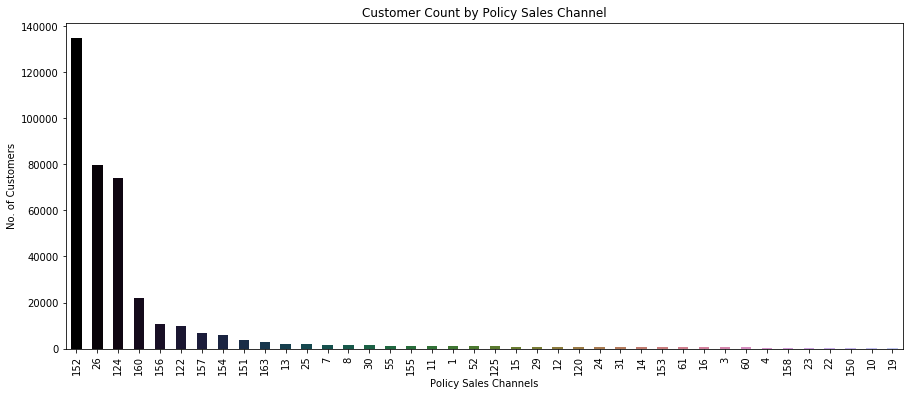

In [10]:
#Policy Sales Channels
c = plt.cm.cubehelix(np.linspace(0,1,50))
ax= train_data["Policy_Sales_Channel"].value_counts().head(40).plot(kind="bar", figsize =(15,6), color =c, title="Customer Count by Policy Sales Channel")
ax.set_xlabel("Policy Sales Channels")
ax.set_ylabel("No. of Customers")
plt.xticks(rotation = 90)
plt.show()

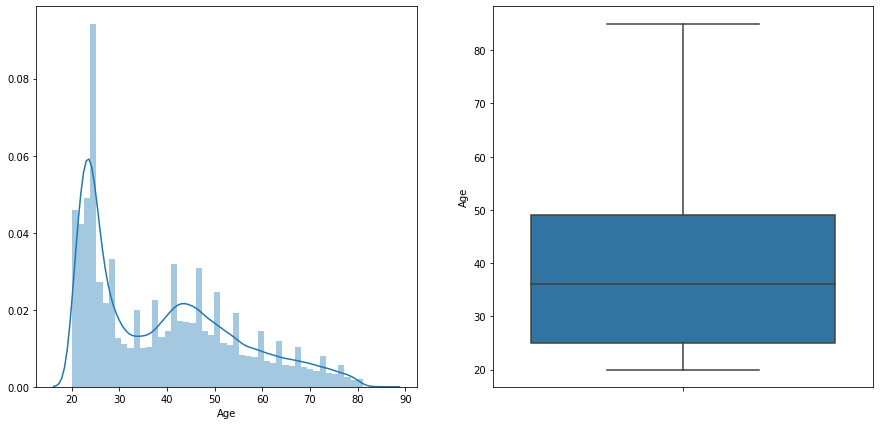

In [11]:
# Age
fig, ax = plt.subplots(1,2, squeeze=False , figsize=(15,7))
sns.distplot(a=train_data["Age"], ax=ax[0][0])
sns.boxplot(y=train_data["Age"],ax=ax[0][1])
plt.show()

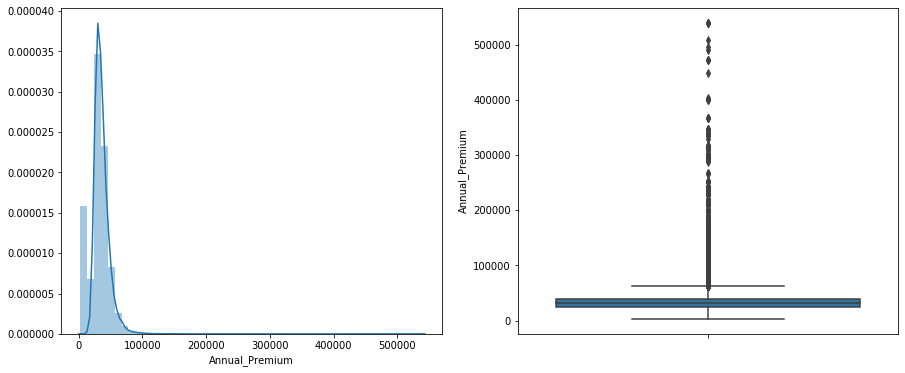

In [12]:
# Annual_Premium
fig, ax = plt.subplots(1,2, squeeze=False , figsize=(15,6))
sns.distplot(a=train_data["Annual_Premium"], ax=ax[0][0])
sns.boxplot(y=train_data["Annual_Premium"],ax=ax[0][1])
plt.show()

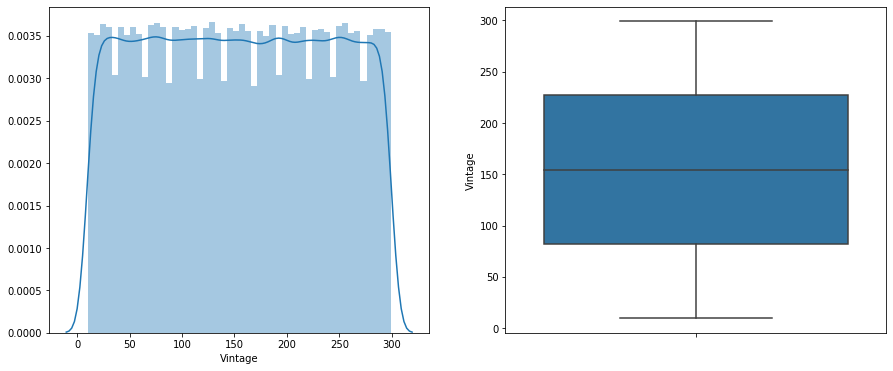

In [13]:
# Vintage
fig, ax = plt.subplots(1,2, squeeze=False , figsize=(15,6))
sns.distplot(a=train_data["Vintage"], ax=ax[0][0])
sns.boxplot(y=train_data["Vintage"],ax=ax[0][1])
plt.show()

0    334399
1     46710
Name: Response, dtype: int64


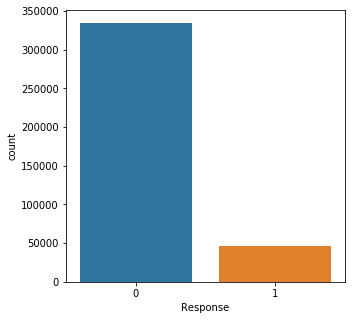

In [14]:
#Target Column - Response
plt.rcParams['figure.figsize'] = (5, 5)
print(train_data["Response"].value_counts())
sns.countplot(train_data["Response"])
plt.show()

In [15]:
train_data["Gender"].replace({'Female':0,'Male':1}, inplace=True)
train_data["Vehicle_Damage"].replace({'No':0,'Yes':1}, inplace= True)
train_data["Vehicle_Age"].replace({'< 1 Year':0.5,'1-2 Year':1.5,'> 2 Years':2.5}, inplace= True)

test_data["Gender"].replace({'Female':0,'Male':1}, inplace=True)
test_data["Vehicle_Damage"].replace({'No':0,'Yes':1}, inplace= True)
test_data["Vehicle_Age"].replace({'< 1 Year':0.5,'1-2 Year':1.5,'> 2 Years':2.5}, inplace= True)

In [16]:
# Creating new feature columns from existing columns
train_data["Average_Annual_Permium_Per_Region_Code"]= train_data.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
train_data["Average_Annual_Permium_Per_Policy_Channel"]= train_data.groupby(["Policy_Sales_Channel"])["Annual_Premium"].transform('mean')

test_data["Average_Annual_Permium_Per_Region_Code"]= test_data.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
test_data["Average_Annual_Permium_Per_Policy_Channel"]= test_data.groupby(["Policy_Sales_Channel"])["Annual_Premium"].transform('mean')

In [17]:
train_data.dtypes

id                                             int64
Gender                                         int64
Age                                            int64
Driving_License                                int64
Region_Code                                    int32
Previously_Insured                             int64
Vehicle_Age                                  float64
Vehicle_Damage                                 int64
Annual_Premium                               float64
Policy_Sales_Channel                           int32
Vintage                                        int64
Response                                       int64
Average_Annual_Permium_Per_Region_Code       float64
Average_Annual_Permium_Per_Policy_Channel    float64
dtype: object

In [18]:
X_train = train_data.drop(labels=["id","Response","Vintage"], axis=1)
y_train = train_data["Response"]
X_test = test_data.drop(labels=["id","Vintage"], axis=1)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(381109, 11)
(127037, 11)
(381109,)


## CAT BOOST Classifier

In [ ]:
from catboost import CatBoostClassifier
cat_columns = ["Region_Code","Policy_Sales_Channel"]
cat_boost_classifier = CatBoostClassifier(n_estimators=400, learning_rate=0.05,random_state=100,max_depth=6,
                                          cat_features=cat_columns)
cat_boost_classifier.fit(X_train, y_train)

In [21]:
y_train_prediction = cat_boost_classifier.predict_proba(X_train)
y_test_prediction = cat_boost_classifier.predict_proba(X_test)
print("Accuracy on training set",roc_auc_score(y_train, y_train_prediction[:,1]))

sample_submission = pd.read_csv("sample_submission.csv", index_col=None)
sample_submission["Response"] = y_test_prediction[:,1]
sample_submission.to_csv("sample_submission.csv", index= False)

Accuracy on training set 0.862056750458316
